In [ ]:
import math


dim = 1024
# number of HVs to add in a sample
num = 128

dw_am_sample = math.ceil(math.log2(num))
dw_am_sample

7

In [ ]:
m = 256

# sample 
dw_am = math.ceil(math.log2(m))
dw_am

8

In [1]:
# logic = 0b1001
logic = 9

In [4]:
import torch

ten = torch.tensor(logic, dtype=torch.int32)
ten

tensor(9, dtype=torch.int32)

In [9]:
# 假设我们有一个由0和1构成的torch.tensor
binary_tensor = torch.tensor([1, 0, 1, 1, 0, 1], dtype=torch.uint8)

# 将二进制张量转换为整数
integer = binary_tensor.sum().item()

print(integer)  # 输出整数

4


In [42]:
def int_to_tensor(number, bits):
    """
    Convert an integer to a binary torch.tensor.
    
    Parameters:
    number (int): The integer to convert.
    bits (int): The number of bits to represent the integer.
    
    Returns:
    torch.Tensor: A 1D tensor containing only 0s and 1s representing the integer.
    """
    return torch.tensor([((number >> i) & 1) for i in range(bits - 1, -1, -1)], dtype=torch.uint8)

# Example usage:
number = 5  # Decimal number
bits = 10  # Number of bits to represent the number
binary_tensor = int_to_tensor(number, bits)
print(binary_tensor[-8:])  # Output: tensor([1, 0, 1, 1, 0, 1])

tensor([0, 0, 0, 0, 0, 1, 0, 1], dtype=torch.uint8)


In [79]:
import torch

def binary_string_to_tensor(binary_str):
    """
    Convert a binary string to a torch.tensor.
    
    Parameters:
    binary_str (str): A binary string starting with '0b'.
    
    Returns:
    torch.Tensor: A tensor containing the binary digits.
    """
    # 去除二进制字符串的前缀'0b'
    binary_str = binary_str[2:]
    # 将字符串转换为整数列表
    binary_list = [int(bit) for bit in binary_str]
    # 创建张量
    tensor = torch.tensor(binary_list, dtype=torch.int8)
    return tensor

In [84]:
def tensor2binStr(tensor):
    """
    Function
    ===
    Convert a torch.tensor containing binary digits to a binary string.
    
    Parameter
    ---
    tensor (torch.Tensor): A 1D tensor containing only 0s and 1s.
    
    Return
    ---
    str: A binary string representation of the tensor.
    """
    # 将tensor转换为Python列表
    binary_list = tensor.tolist()
    # 将列表中的每个数字转换为字符串
    binary_str_list = [str(bit) for bit in binary_list]
    # 将反转后的字符串列表连接成一个字符串
    binary_str = ''.join(binary_str_list)
    # 在字符串前加上'0b'前缀
    return '0b' + binary_str

# 示例使用
binary_str = '0b010100001111'
tensor = binary_string_to_tensor(binary_str)
print(tensor)  # 输出: tensor([0, 1, 0, 1])
tensor2binStr(tensor), int(tensor2binStr(tensor), 2)

tensor([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.int8)


('0b010100001111', 1295)

In [ ]:
import time
from functools import wraps

def time_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        print(f"{func.__name__} took {end_time - start_time} seconds to execute.")
        return result
    return wrapper

@time_decorator
def test_func_time(func, *args, **kwargs):
    """
    Function
    ===
    test the time for a function

    Parameter
    ---
    the function name and its parameters
    """
    func(*args, **kwargs)

test_func_time took 0.0008377590002055513 seconds to execute.
test_func_time took 5.7981000281870365e-05 seconds to execute.


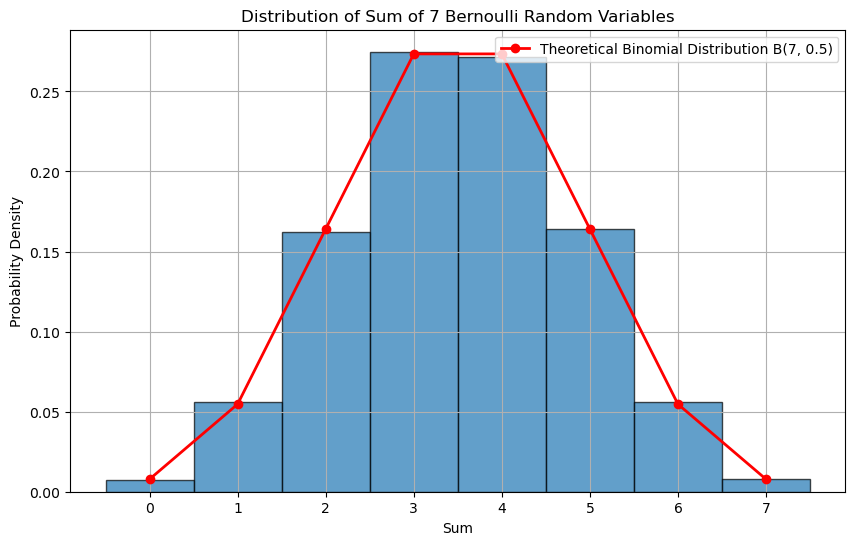

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 参数设置
n = 7  # 每次试验中伯努利随机变量的数量
num_trials = 10000  # 试验次数

# 生成数据：每次试验是n个伯努利随机变量的和
sums = np.sum(np.random.binomial(1, 0.5, (num_trials, n)), axis=1)

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.hist(sums, bins=np.arange(min(sums), max(sums)+2) - 0.5, edgecolor='black', density=True, alpha=0.7)
plt.title(f'Distribution of Sum of {n} Bernoulli Random Variables')
plt.xlabel('Sum')
plt.ylabel('Probability Density')

# 计算理论上的二项分布概率密度函数值
from scipy.stats import binom
x = np.arange(0, n+1)
y = binom.pmf(x, n, 0.5)
plt.plot(x, y, 'ro-', lw=2, label=f'Theoretical Binomial Distribution B({n}, 0.5)')
plt.legend()
plt.grid(True)
plt.show()
